### sklearn 예제

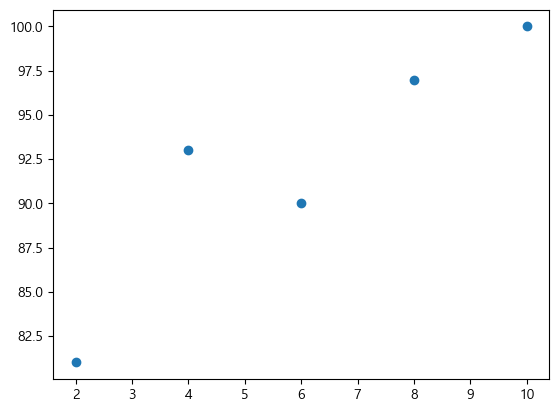

In [451]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = [[2],[4],[6],[8],[10]]
y = [[81],[93],[90],[97],[100]]

plt.scatter(x, y)
plt.show()

In [452]:
model = LinearRegression()
model.fit(x, y)

result = model.predict([[3]])
print(f'예상점수 : {result}')

예상점수 : [[85.9]]


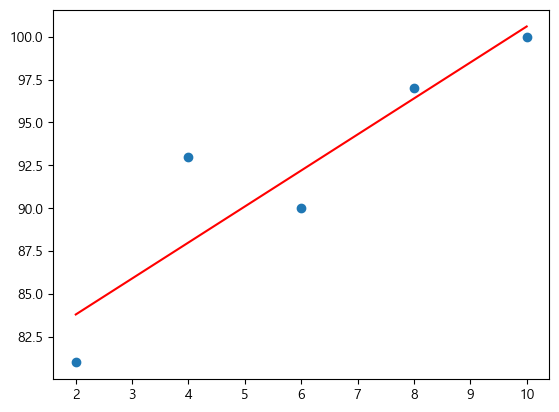

In [453]:
# 회귀선 보여주기
plt.scatter(x, y)
plt.plot(x, model.predict(x), color = 'red')
plt.show()

In [454]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 데이터 전처리

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [456]:
seoul = pd.read_csv("seoul.csv", encoding="cp949")
seoul.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,2015-01-01,-7.7,-9.8,-4.3
1,108,서울,2015-01-02,-6.0,-9.0,-1.9
2,108,서울,2015-01-03,-2.7,-9.2,3.1
3,108,서울,2015-01-04,2.5,0.2,8.5
4,108,서울,2015-01-05,3.7,-1.1,7.9


In [457]:
seoul.describe()

,지점,평균기온(°C),최저기온(°C),최고기온(°C)
count,3653.0,3653.000000,3652.000000,3652.000000
mean,108.0,13.619628,9.511637,18.477629
std,0.0,10.619390,10.830569,10.686004
min,108.0,-14.900000,-18.600000,-10.700000
25%,108.0,4.600000,0.400000,9.200000
50%,108.0,14.800000,10.200000,20.300000
75%,108.0,23.000000,19.000000,27.600000
max,108.0,33.700000,30.300000,39.600000


In [458]:
seoul.drop('지점',axis=1,inplace=True)
seoul.drop('지점명',axis=1,inplace=True)
seoul.head()

,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,2015-01-01,-7.7,-9.8,-4.3
1,2015-01-02,-6.0,-9.0,-1.9
2,2015-01-03,-2.7,-9.2,3.1
3,2015-01-04,2.5,0.2,8.5
4,2015-01-05,3.7,-1.1,7.9


In [459]:
seoul.columns=['날짜','평균기온','최저기온','최고기온']
seoul['날짜'] = pd.to_datetime(seoul['날짜'])
seoul.head()

,날짜,평균기온,최저기온,최고기온
0,2015-01-01,-7.7,-9.8,-4.3
1,2015-01-02,-6.0,-9.0,-1.9
2,2015-01-03,-2.7,-9.2,3.1
3,2015-01-04,2.5,0.2,8.5
4,2015-01-05,3.7,-1.1,7.9


In [460]:
seoul.dropna(subset=['최저기온'],axis=0,inplace=True)
seoul.dropna(subset=['최고기온'],axis=0,inplace=True)
print(seoul.isnull().sum())

날짜      0
평균기온    0
최저기온    0
최고기온    0
dtype: int64


In [461]:
seoul['년도']=seoul['날짜'].dt.year
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 0 to 3652
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      3651 non-null   datetime64[ns]
 1   평균기온    3651 non-null   float64       
 2   최저기온    3651 non-null   float64       
 3   최고기온    3651 non-null   float64       
 4   년도      3651 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(1)
memory usage: 156.9 KB


In [462]:
conditions=(seoul['날짜'].dt.month==8) & (seoul['날짜'].dt.day==15)
conditions

0       False
1       False
2       False
3       False
4       False
        ...  
3648    False
3649    False
3650    False
3651    False
3652    False
Name: 날짜, Length: 3651, dtype: bool

### 서울 년도별 평균

In [463]:
seoul0815=seoul[conditions]
seoul0815

,날짜,평균기온,최저기온,최고기온,년도
226,2015-08-15,27.1,23.1,30.8,2015
592,2016-08-15,29.1,25.8,34.0,2016
957,2017-08-15,21.9,20.8,24.0,2017
1322,2018-08-15,31.7,28.3,38.0,2018
1687,2019-08-15,25.9,23.9,28.6,2019
2053,2020-08-15,26.1,25.0,27.0,2020
2418,2021-08-15,26.9,21.7,32.4,2021
2783,2022-08-15,28.1,26.6,29.8,2022
3148,2023-08-15,28.6,24.7,32.7,2023
3514,2024-08-15,29.2,26.7,34.6,2024


In [464]:
X = seoul0815[['년도']]
Y = seoul0815['평균기온']

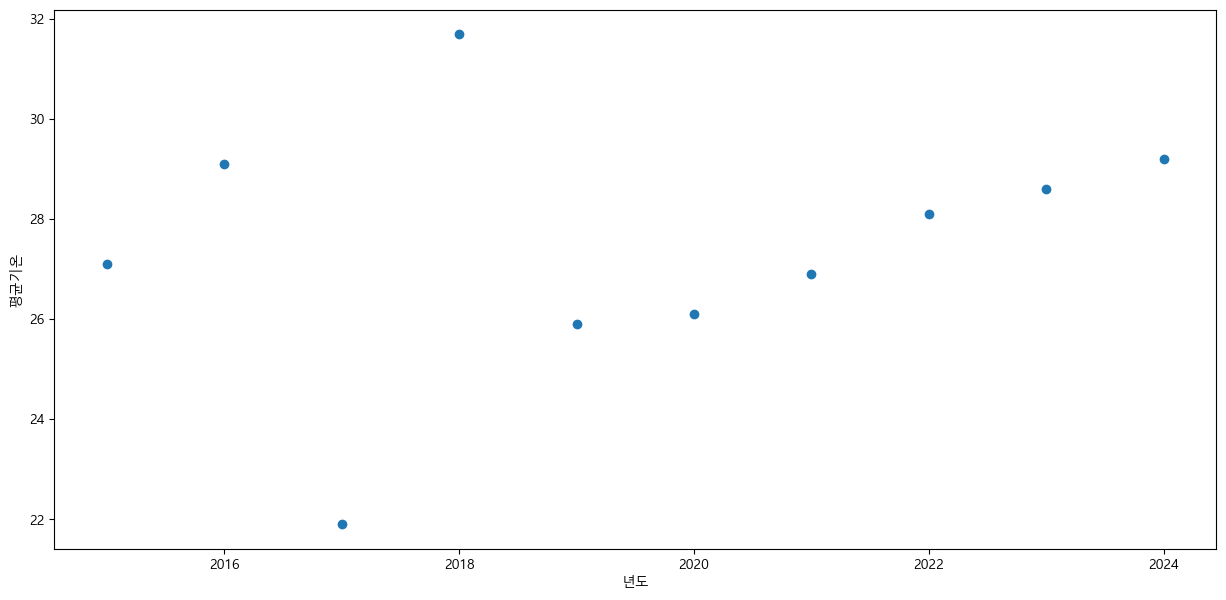

In [465]:
fig = plt.figure(figsize=(15,7))
plt.rc('font', family='Malgun Gothic')
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.scatter(X,Y)
plt.show()

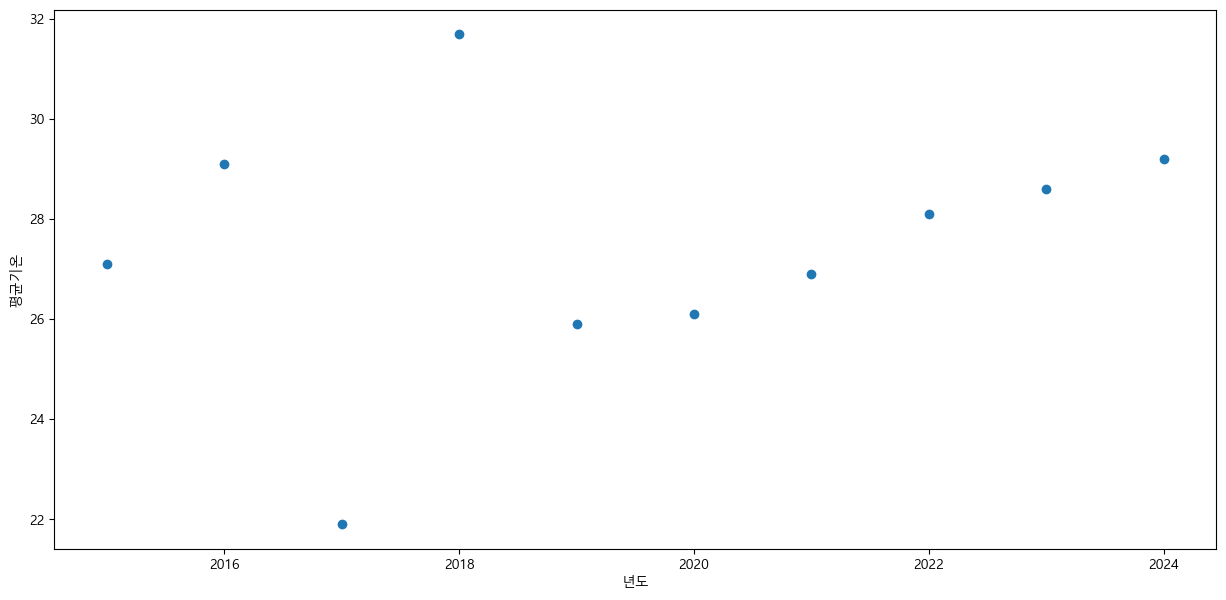

In [466]:
fig = plt.figure(figsize=(15,7))
plt.rc('font', family='Malgun Gothic')
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.scatter(X,Y)
plt.show()

In [467]:
from sklearn.linear_model import LinearRegression

In [468]:
model = LinearRegression()
X = seoul0815[['년도']]
Y = seoul0815['평균기온']
model.fit(X,Y)

LinearRegression()

In [469]:
result = model.predict([[2025]])
print(f'2025년 8월 15일 예상 평균기온 : {result}')

2025년 8월 15일 예상 평균기온 : [28.53333333]


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [470]:
x = seoul0815['년도']
y = seoul0815['평균기온']
f1 = np.polyfit(x,y,2)
fx = np.linspace(2015,2024)

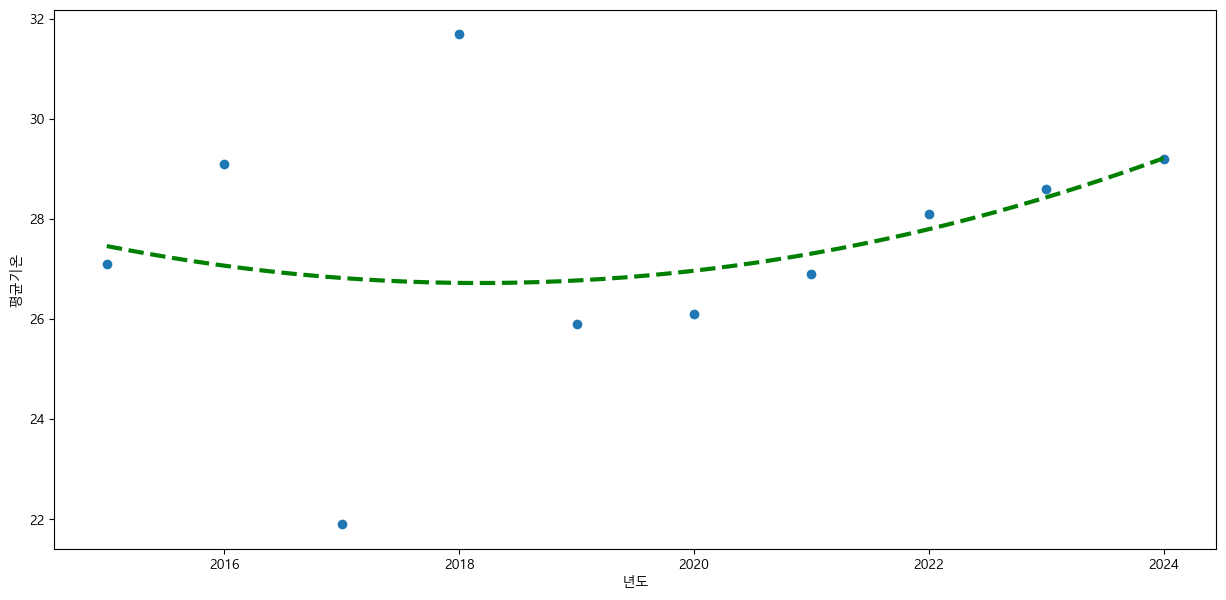

In [471]:
plt.figure(figsize=(15,7))
plt.scatter(x,y)
plt.plot(fx,np.polyval(f1,fx), ls='dashed', lw = 3, color='g')
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.show()

### 

### 서울 날씨데이터 학습 및 채점

In [472]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [473]:
plt.figure(figsize=(15,7))
X = seoul[['년도','최저기온','최고기온']]
Y = seoul['평균기온']

<Figure size 1500x700 with 0 Axes>

In [474]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.7, test_size=0.3)

In [475]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


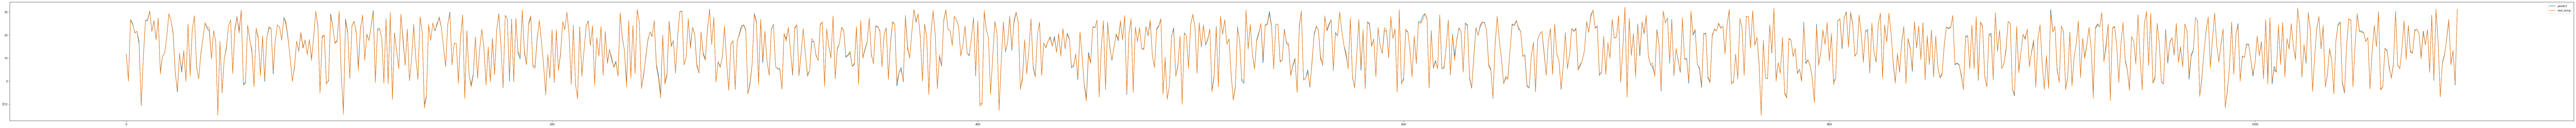

In [485]:
plt.figure(figsize=(150,7))
plt.plot(y_predict, label='predict')
plt.plot(y_test.values.reshape(-1,1), label='real_temp')
plt.legend()
plt.show()

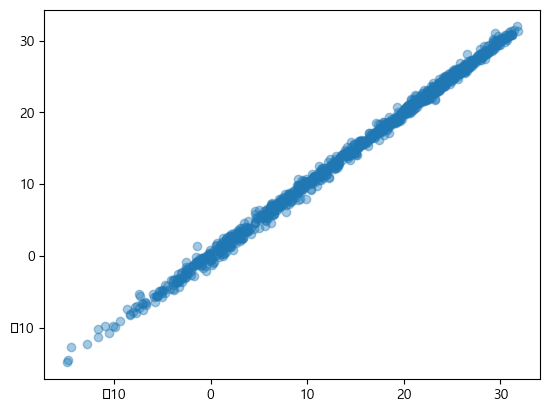

0.997760713942135


In [486]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.show()
print(model.score(x_train,y_train))